# Data Cleaning

## Reading and Basic Info

In [90]:
import pandas as pd

In [91]:
import os

In [92]:
path = r'D:\Technocolab\Mini Project 2\Task 1 Data set'

In [93]:
df = pd.read_excel(os.path.join(path,'default_of_credit_card_clients.xls'))

In [94]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [95]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [96]:
df['ID'].unique()

array(['798fc410-45c1', '8a8c8f3b-8eb4', '85698822-43f5', ...,
       '95cdd3e7-4f24', '00d03f02-04cd', '15d69f9f-5ad3'], dtype=object)

In [97]:
df['ID'].nunique()

29687

In [98]:
df.shape

(30000, 25)

In [99]:
df['ID'].value_counts().value_counts()

1    29374
2      313
Name: ID, dtype: int64

## Random Sampling, Boolean Masking & Cleaning

### Sampling

In [100]:
import numpy as np

In [105]:
np.random.seed(seed=27)

In [106]:
random_integers = np.random.randint(low=1,high=5,size=100)

In [107]:
random_integers[:5]

array([4, 1, 1, 4, 1])

In [108]:
is_equal_to_3 = random_integers == 3

In [109]:
is_equal_to_3[:5]

array([False, False, False, False, False])

In [110]:
sum(is_equal_to_3)

20

In [111]:
random_integers[is_equal_to_3]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

### Boolean Mask

In [112]:
id_counts = df['ID'].value_counts()
dupe_mask = id_counts == 2  # these are not unique values
dupe_mask[0:5]

e850d228-6879    True
d2a47fa6-0f6a    True
cfa9d026-de0d    True
71b26a8d-da70    True
4cf8397f-6359    True
Name: ID, dtype: bool

In [115]:
id_counts.index

Index(['e850d228-6879', 'd2a47fa6-0f6a', 'cfa9d026-de0d', '71b26a8d-da70',
       '4cf8397f-6359', '37a1d9c2-701c', '94c4ece8-bba6', '04c32736-903c',
       '3511ed92-c434', '2189fc56-f82a',
       ...
       '59a51dfc-0bbe', '447e9a72-c8ab', '63995b31-bc41', 'e67c0277-df5d',
       '5667764d-8941', 'b7c9197f-3d70', '57879be1-e844', 'd7a5d215-3fb8',
       'b4babada-4d75', 'f443201a-aa3a'],
      dtype='object', length=29687)

In [116]:
dupe_mask

e850d228-6879     True
d2a47fa6-0f6a     True
cfa9d026-de0d     True
71b26a8d-da70     True
4cf8397f-6359     True
                 ...  
b7c9197f-3d70    False
57879be1-e844    False
d7a5d215-3fb8    False
b4babada-4d75    False
f443201a-aa3a    False
Name: ID, Length: 29687, dtype: bool

In [117]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [118]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10) 


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2597,d2a47fa6-0f6a,90000,2,2,2,24,0,0,0,0,...,5152,4664,4833,1240,1220,1000,500,800,1680,0
2697,d2a47fa6-0f6a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15467,cfa9d026-de0d,290000,1,2,1,38,0,0,0,0,...,84836,82168,80299,5000,3530,3019,2818,3000,3199,0
15567,cfa9d026-de0d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15936,e850d228-6879,130000,2,2,2,42,Not available,0,0,-1,...,21000,858,2160,5026,5000,21000,858,2160,200,0
16036,e850d228-6879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
df_zero_mask = df == 0


In [120]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)


315

### First Clean Version

In [121]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()


In [122]:
df_clean_1.shape

(29685, 25)

In [123]:
df_clean_1['ID'].nunique()


29685

In [124]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [125]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [126]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [127]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [128]:
sum(valid_pay_1_mask)

26664

### Second clean verison

In [129]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()


In [130]:
df_clean_2.shape

(26664, 25)

In [131]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [132]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


### Checking some features by visualizing them

In [133]:
import matplotlib.pyplot as plt #import plotting package
 
#render plotting automatically
%matplotlib inline
 
import matplotlib as mpl #additional plotting functionality
 
mpl.rcParams['figure.dpi'] = 400 #high resolution figures

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B31EE83188>,
      dtype=object)

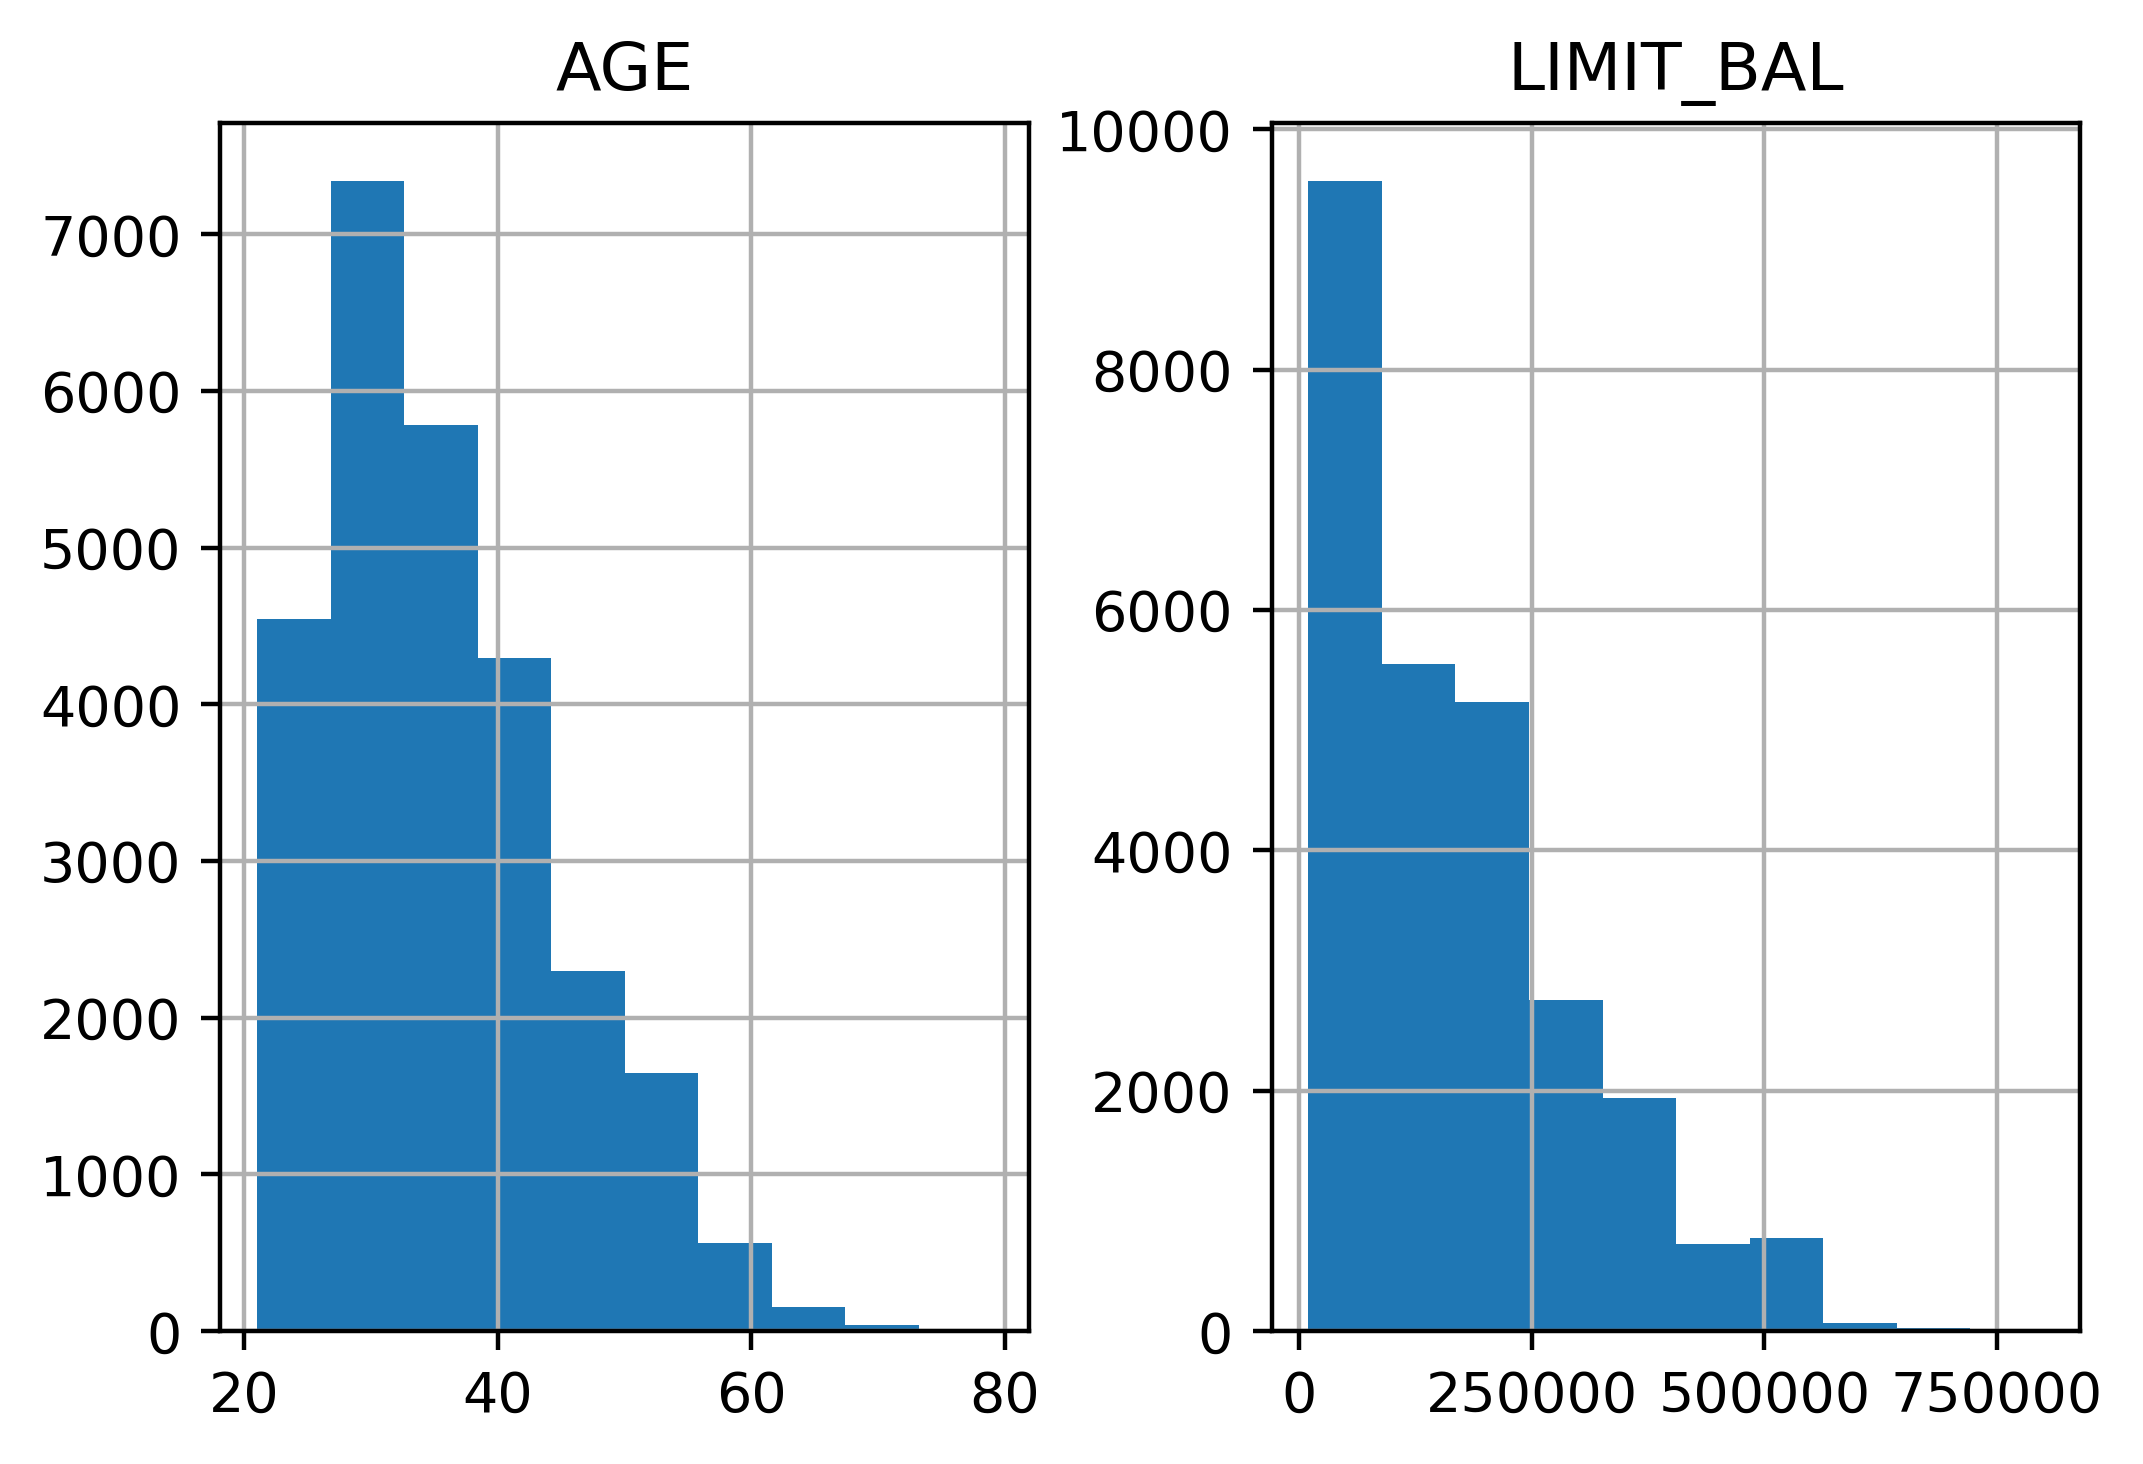

In [134]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [135]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [136]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [137]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [138]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [139]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

Text(0.5, 0, 'Education level: ordinal encoding')

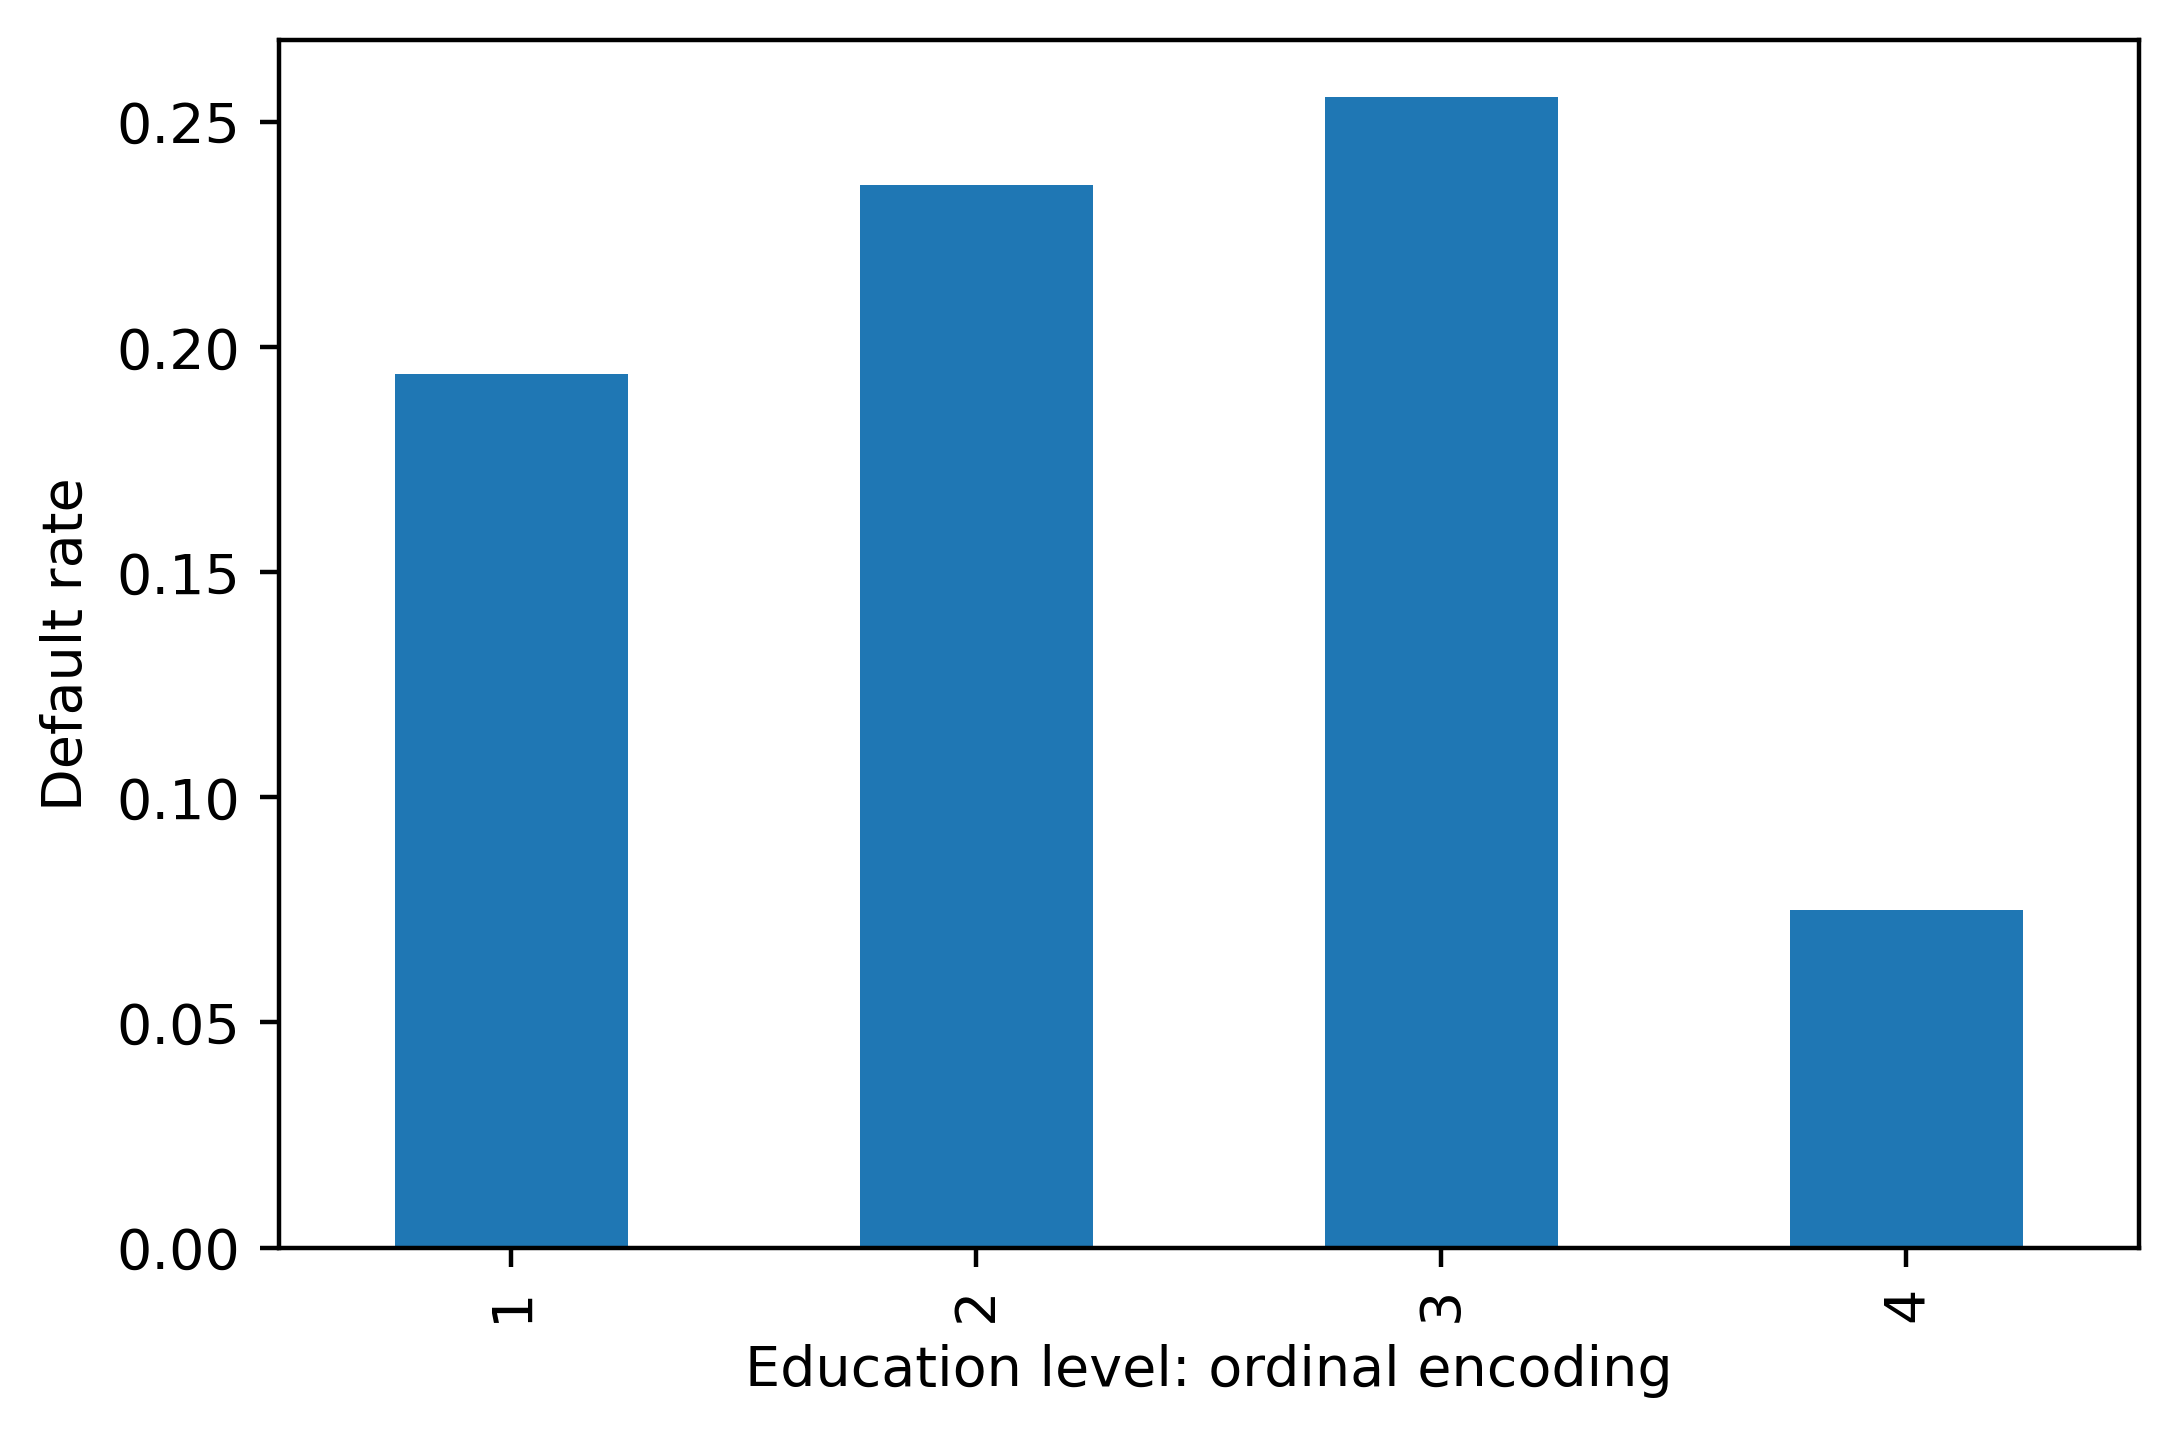

In [140]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

In [141]:
df_clean_2['EDUCATION_CAT'] = 'none'


In [142]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)


,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [143]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [144]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [145]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [146]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [147]:
df_with_ohe.to_csv('cleaned_data.csv', index=False)

# Exploring Data (Visualizing)

In [156]:
df = pd.read_csv('cleaned_data.csv')

In [157]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [158]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [159]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

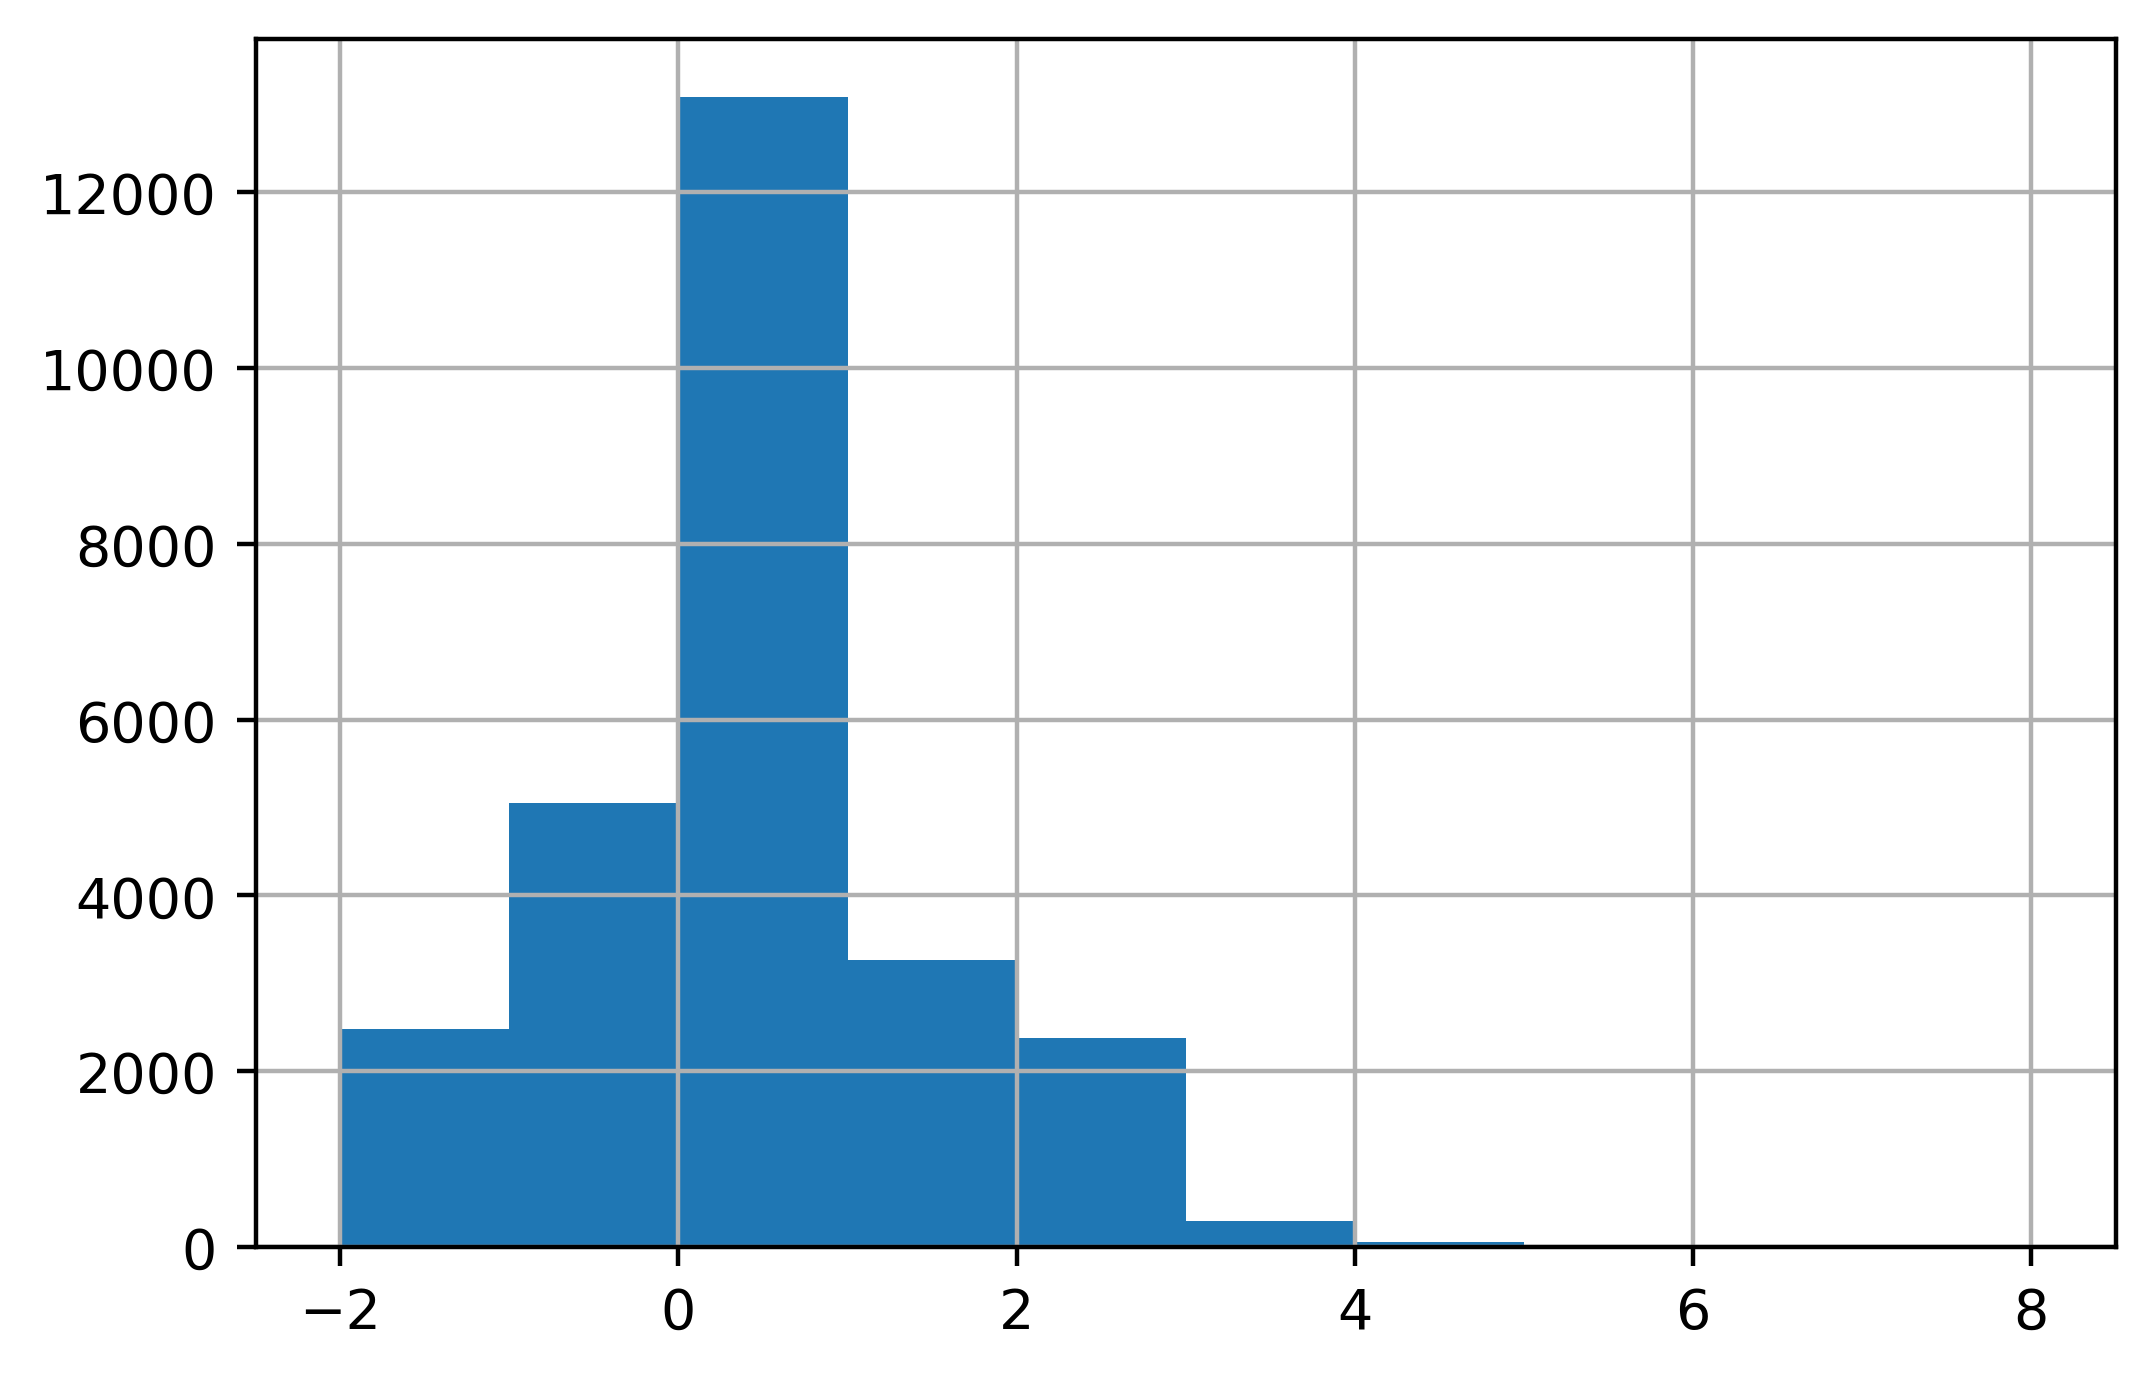

In [160]:
df[pay_feats[0]].hist()

In [161]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

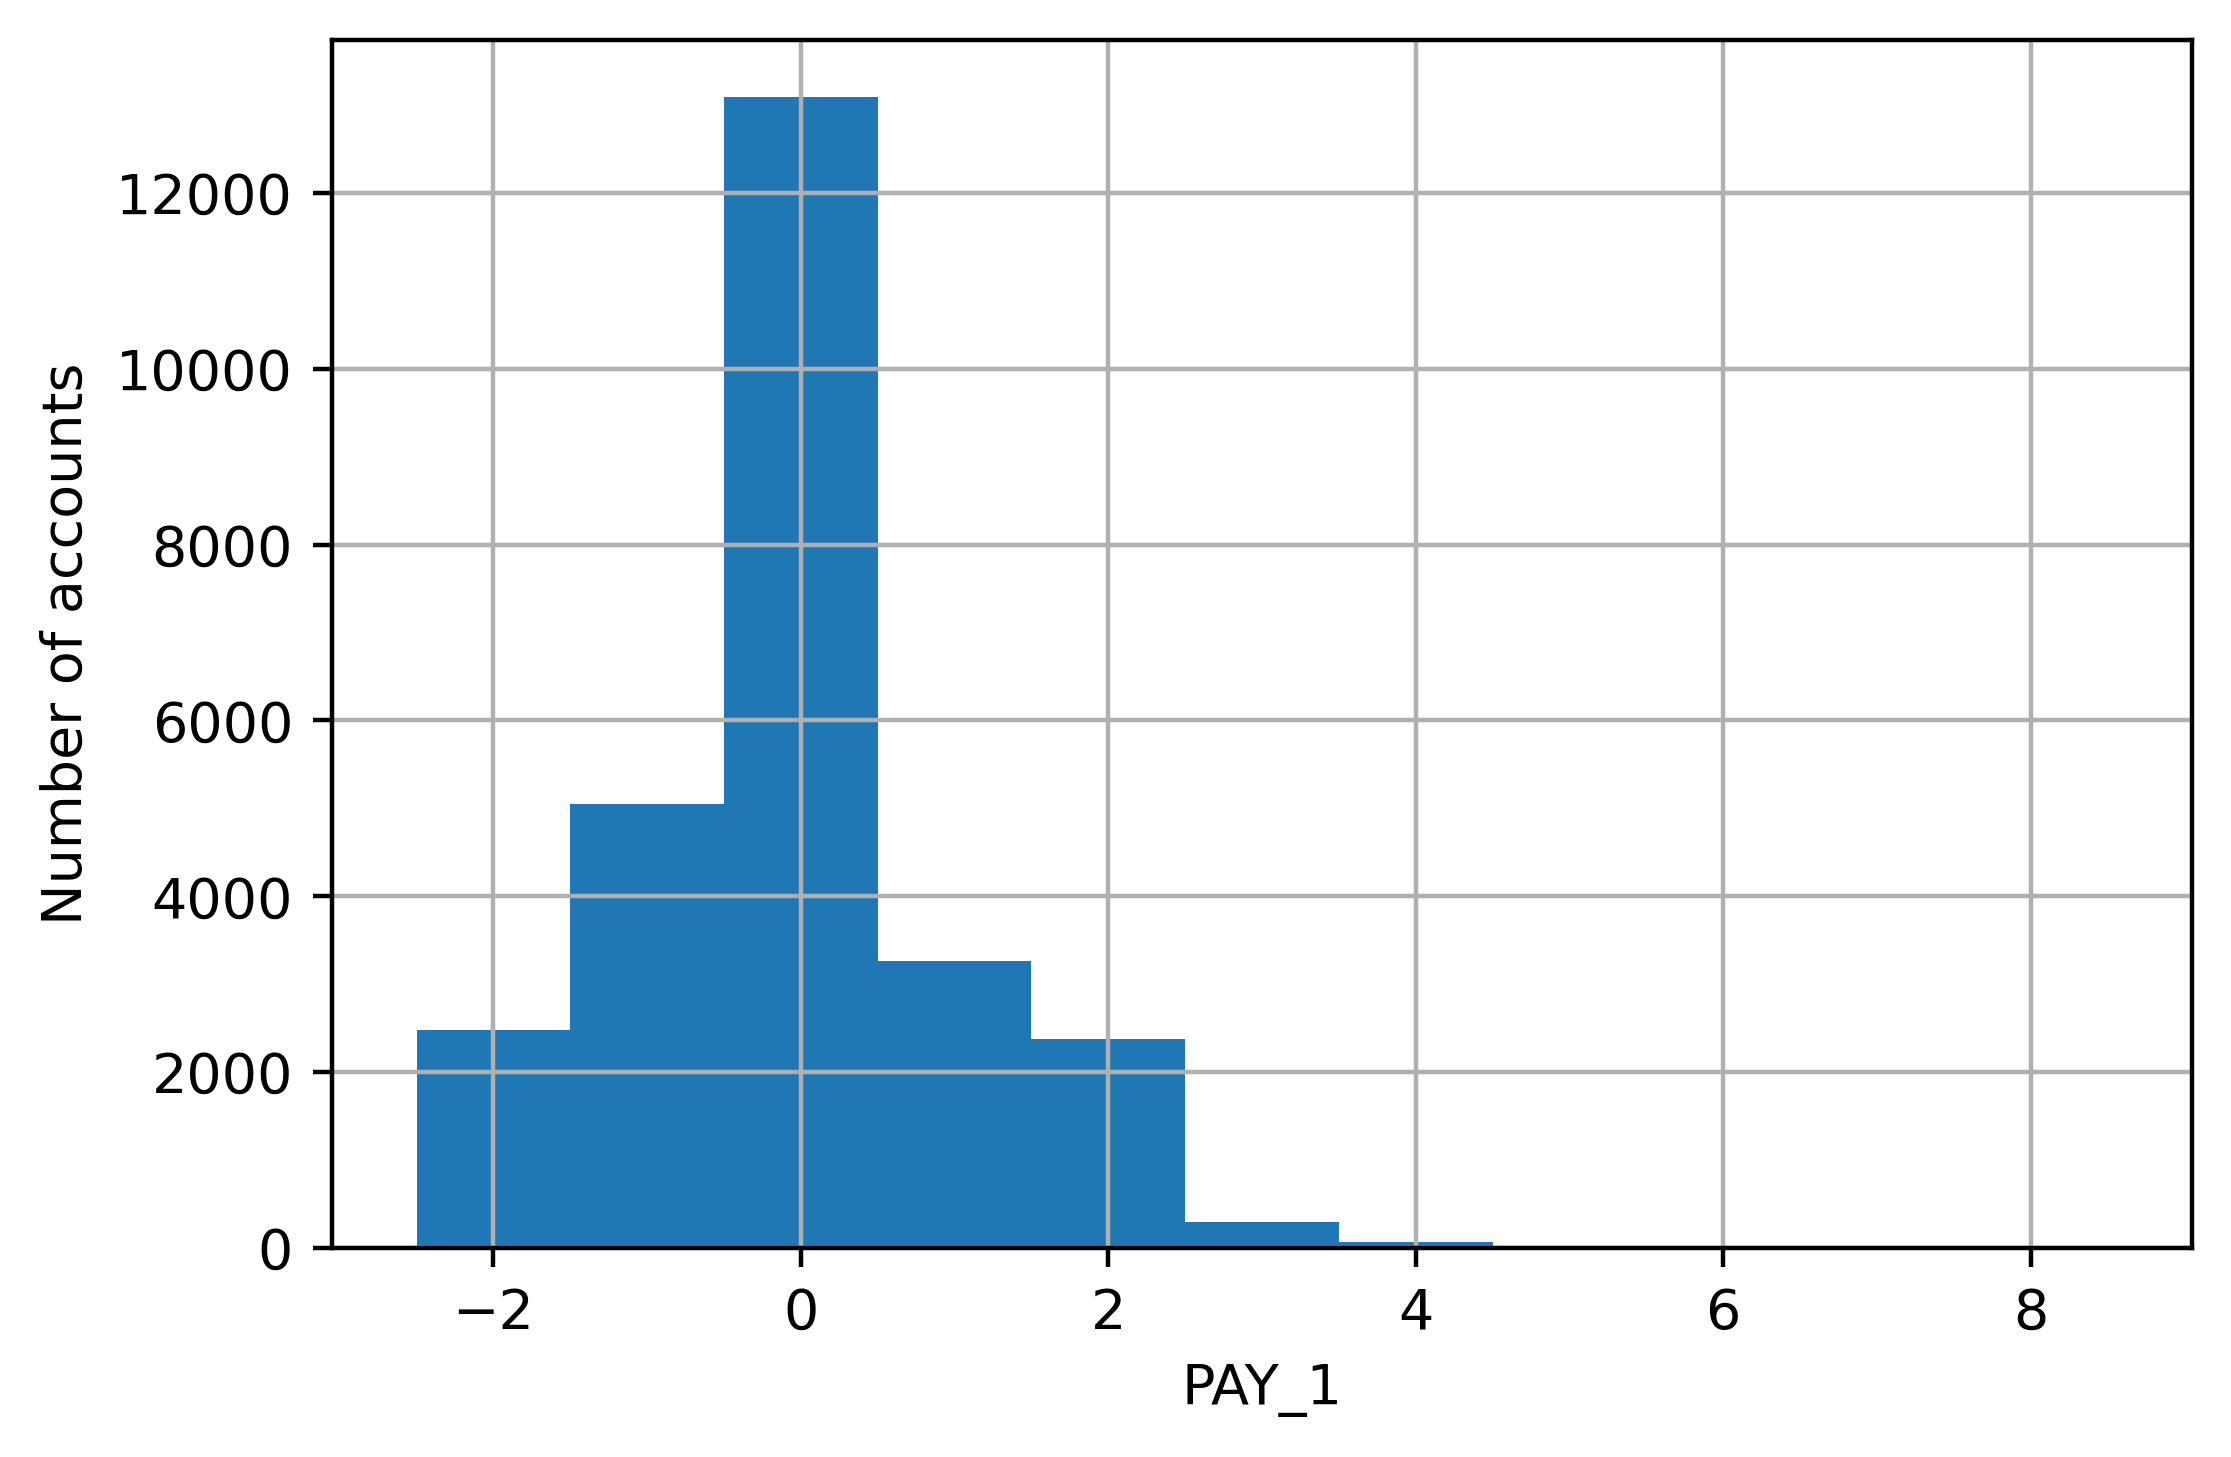

In [162]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B326424E48>,
      dtype=object)

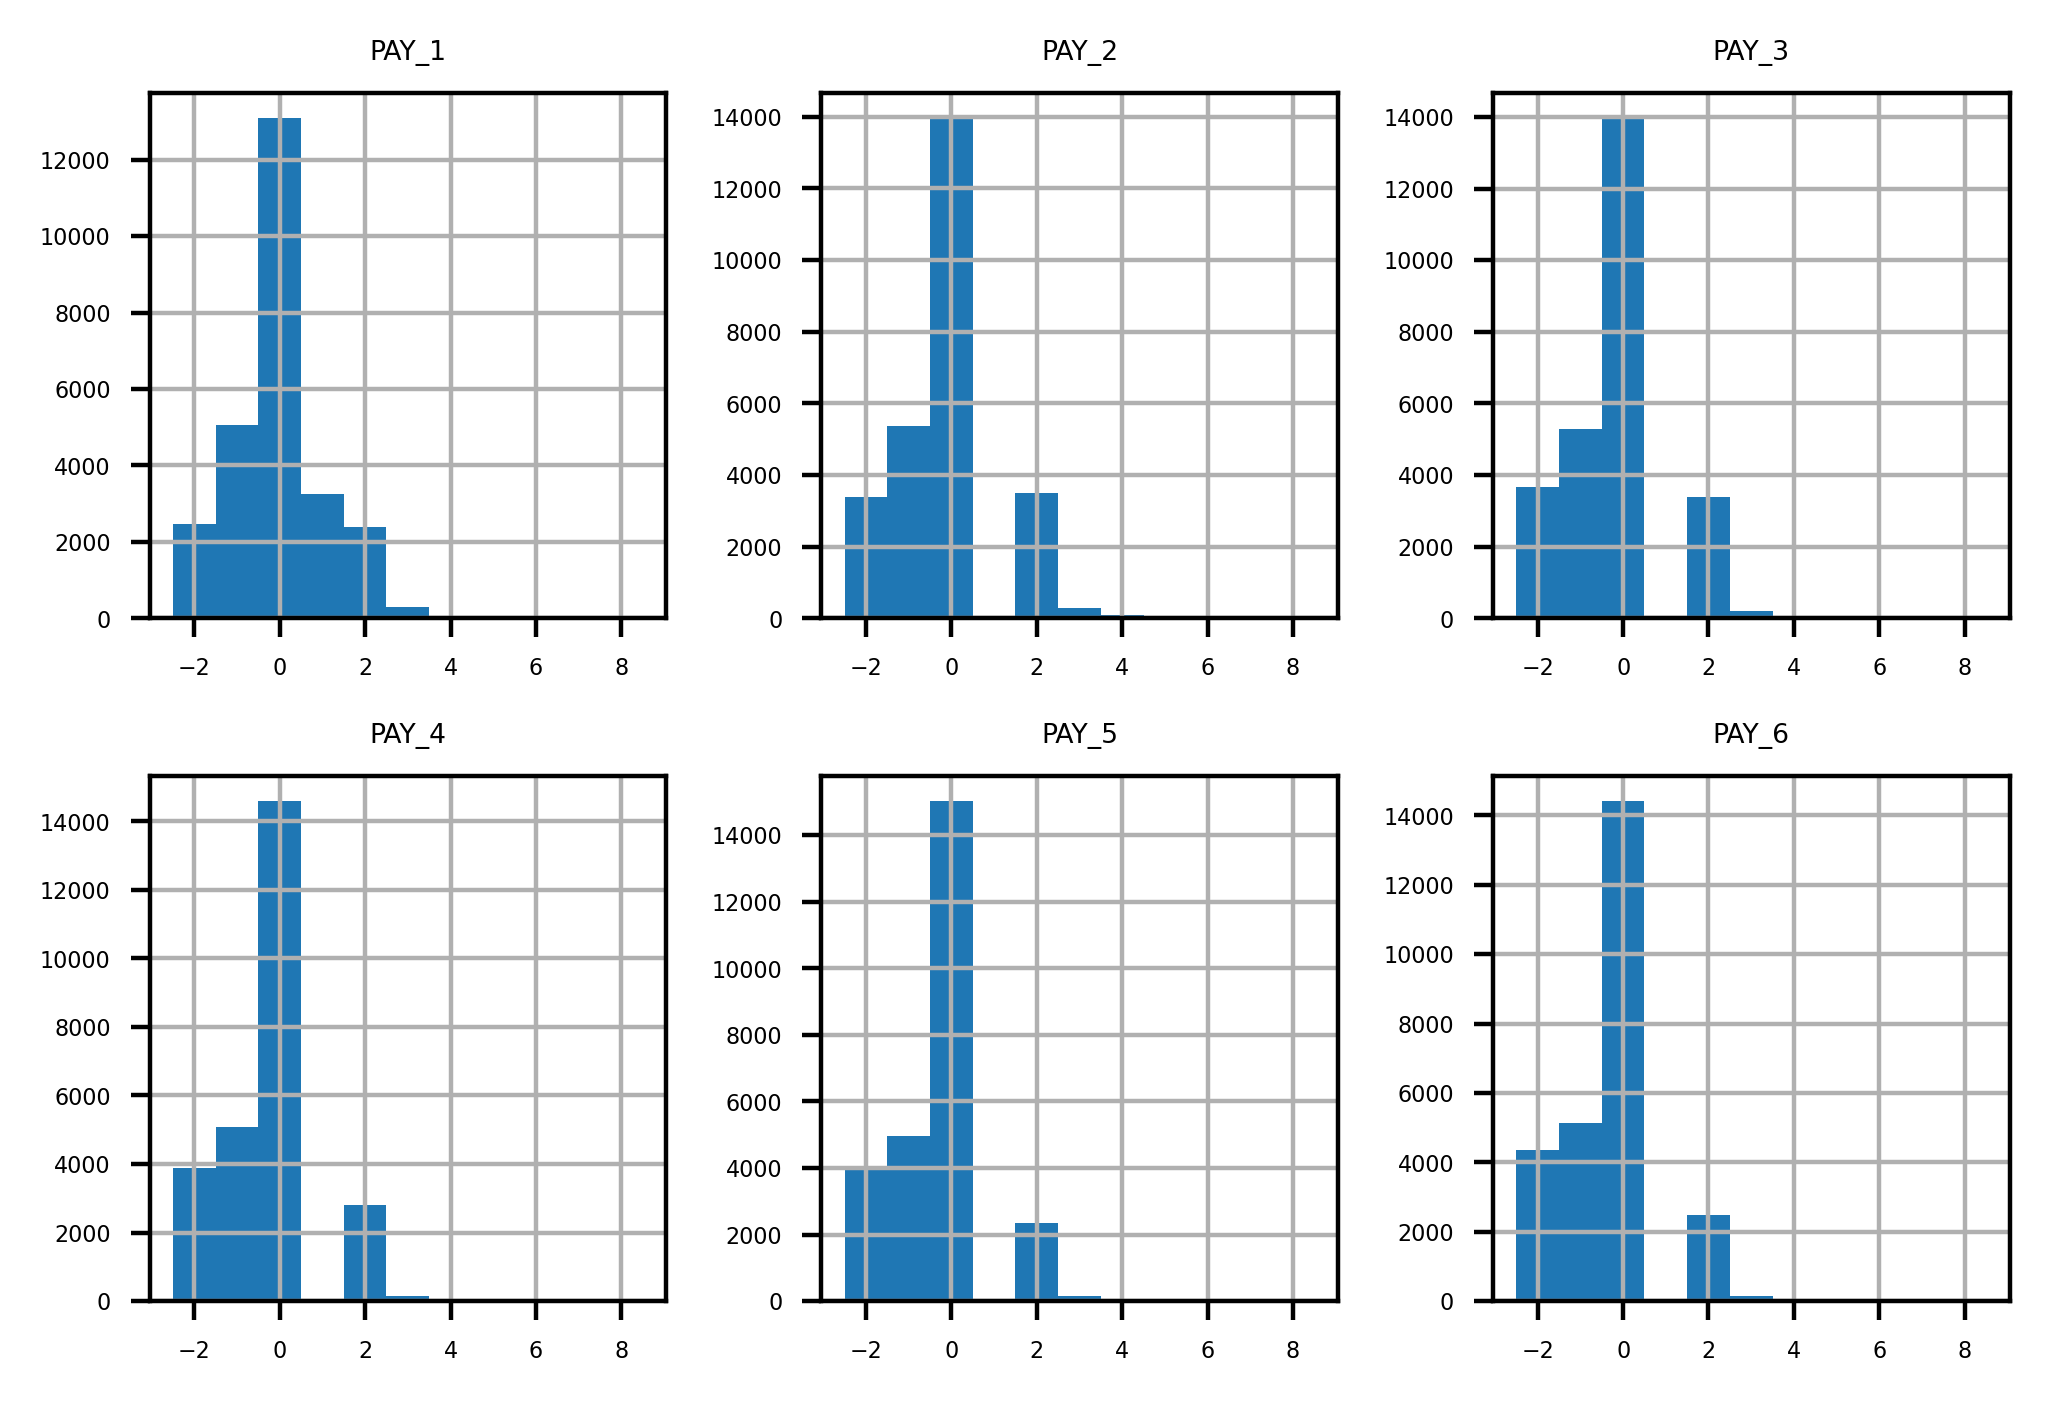

In [163]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In [164]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2
